In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [1]:
!python test.py

0.8766086237423817


In [3]:
!cat ./patches/viewpoint-1/labels.txt | head -n 5

img2_patch0 img1_patch0
img2_patch1 img1_patch1
img2_patch2 img1_patch2
img2_patch3 img1_patch3
img2_patch4 img1_patch4


In [51]:
from skimage.io import imread
from descriptor import distance_weighted, extract_for_patch

patch1_org = imread('./patches/viewpoint-2/img4_patch3.png', as_grey=True)
patch1_ref = imread('./patches/viewpoint-2/img1_patch4.png', as_grey=True)
patch1_wrong = imread('./patches/viewpoint-2/img3_patch7.png', as_grey=True)

desc1_org = extract_for_patch(patch1_org)
desc1_ref = extract_for_patch(patch1_ref)
desc1_wrong = extract_for_patch(patch1_wrong)

Should be =0, is =0.15251950759715005
Should be =1, is =0.1063468737607991


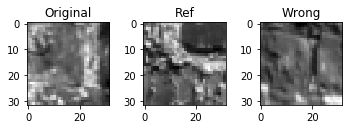

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5, 2))
ax1.title.set_text('Original')
ax1.imshow(patch1_org, cmap='gray')
ax2.title.set_text('Ref')
ax2.imshow(patch1_ref, cmap='gray')
ax3.title.set_text('Wrong')
ax3.imshow(patch1_wrong, cmap='gray')
plt.tight_layout()


print('Should be =0, is ={}'.format(distance_weighted(desc1_org, desc1_ref, w_moments=0, w_exposure=1.0)))
print('Should be =1, is ={}'.format(distance_weighted(desc1_org, desc1_wrong, w_moments=0, w_exposure=1.0)))

Should be =0, is =0.6277077311755432
Should be =1, is =0.23230452053925627


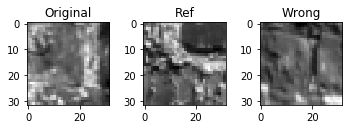

In [53]:
# Hu moments
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5, 2))
ax1.title.set_text('Original')
ax1.imshow(patch1_org, cmap='gray')
ax2.title.set_text('Ref')
ax2.imshow(patch1_ref, cmap='gray')
ax3.title.set_text('Wrong')
ax3.imshow(patch1_wrong, cmap='gray')
plt.tight_layout()

print('Should be =0, is ={}'.format(distance_weighted(desc1_org, desc1_ref, w_moments=1.0, w_exposure=0.0)))
print('Should be =1, is ={}'.format(distance_weighted(desc1_org, desc1_wrong, w_moments=1.0, w_exposure=0.0)))

(20, 20)


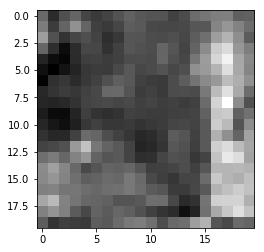

In [59]:
img_h, img_w = patch1_org.copy().shape
h, w = (20, 20)
diff_h, diff_w = img_h - h, img_w - w
patch = patch1_org.copy()[int(diff_h/2):-int(diff_h/2),
                          int(diff_w/2):-int(diff_w/2)]

plt.imshow(patch, cmap='gray')
print(patch.shape)